# Implementacion Perceptron Regresivo en Python
Para esto, resolveremos el caso Ecommerce adaptando nuestro perceptrón de clasificación para que resuelva un problema de regresión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Ecommerce.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Formulación del Modelo

In [4]:
# Seleccionamos las variables explicativas (features) y la variable objetivo (target)
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values
y = df['Yearly Amount Spent'].values

### Implementación Perceptrón

In [5]:
# Implementación de un perceptrón regresivo (regresión lineal con descenso de gradiente)
class PerceptronRegresivo:
    def __init__(self, input_size, learning_rate=0.001, epochs=1000):
        # pesos (incluye el sesgo en la primera posición)
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []  # para guardar el error (MSE) en cada epoch

    def _add_bias(self, X):
        # agrega una columna de 1s al inicio (término de sesgo)
        return np.c_[np.ones((X.shape[0], 1)), X]

    def predict(self, X):
        Xb = self._add_bias(X)
        return Xb @ self.weights

    def fit(self, X, y):
        Xb = self._add_bias(X)
        n = Xb.shape[0]
        for _ in range(self.epochs):
            y_pred = Xb @ self.weights
            error = y - y_pred
            mse = np.mean(error**2)
            self.loss_history.append(mse)
            # gradiente del MSE respecto a los pesos
            grad = (-2/n) * (Xb.T @ error)
            self.weights -= self.learning_rate * grad

In [6]:
# División de los datos en training y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalamiento de las features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((400, 4), (100, 4))

In [7]:
# Creación y entrenamiento del modelo
percep_reg = PerceptronRegresivo(input_size=X_train_scaled.shape[1], learning_rate=0.0005, epochs=2000)
percep_reg.fit(X_train_scaled, y_train)

In [8]:
# Pesos aprendidos (primero es el sesgo)
percep_reg.weights

array([4.34122850e+02, 2.21126129e+01, 3.41270103e+01, 3.76374938e-01,
       5.56755992e+01])

In [9]:
# Predicciones sobre el set de entrenamiento y de test
y_train_pred = percep_reg.predict(X_train_scaled)
y_test_pred = percep_reg.predict(X_test_scaled)

## Haciendo Predicciones

In [10]:
# Ejemplo de algunas predicciones vs valores reales (test)
comparison = pd.DataFrame({
    'Real': y_test[:10],
    'Predicho': y_test_pred[:10]
})
comparison

,Real,Predicho
0,401.033135,347.107837
1,534.777188,469.812389
2,418.602742,367.779631
3,503.978379,434.385225
4,410.069611,353.121819
5,557.608262,494.177982
6,538.941975,459.810115
7,514.336558,437.575108
8,408.620188,351.769087
9,475.015407,408.945309


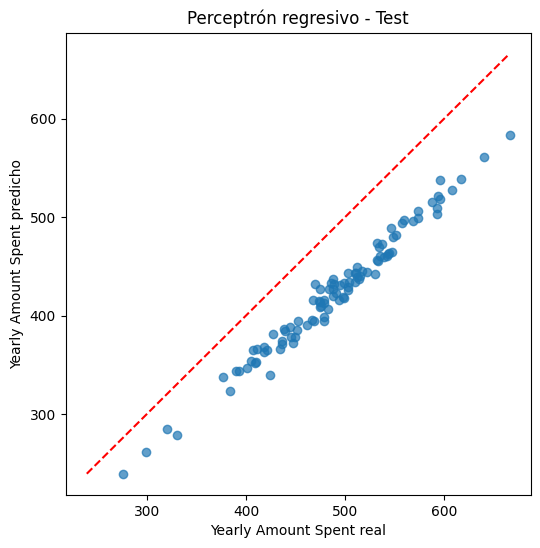

In [11]:
# Gráfico de valores reales vs predichos (test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Yearly Amount Spent real')
plt.ylabel('Yearly Amount Spent predicho')
plt.title('Perceptrón regresivo - Test')
# línea identidad
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

## Evaluando el desempeño

In [12]:
# Métricas de evaluación para regresión
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Métricas en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_train, rmse_train, r2_train

(4799.288267960972, np.float64(69.27689562878068), 0.26996163203457735)

In [14]:
# Métricas en test
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

mse_test, rmse_test, r2_test

(4460.603774753685, np.float64(66.7877516821287), 0.09918291303538751)

In [15]:
print('Entrenamiento:')
print(f'MSE:  {mse_train:.2f}')
print(f'RMSE: {rmse_train:.2f}')
print(f'R2:   {r2_train:.4f}')

print('\nTest:')
print(f'MSE:  {mse_test:.2f}')
print(f'RMSE: {rmse_test:.2f}')
print(f'R2:   {r2_test:.4f}')

Entrenamiento:
MSE:  4799.29
RMSE: 69.28
R2:   0.2700

Test:
MSE:  4460.60
RMSE: 66.79
R2:   0.0992


### Error por epochs

In [16]:
# Error (MSE) por epoch
epochs = range(1, len(percep_reg.loss_history) + 1)
len(percep_reg.loss_history)

2000

Text(0.5, 1.0, 'Evolución del error (MSE) durante el entrenamiento')

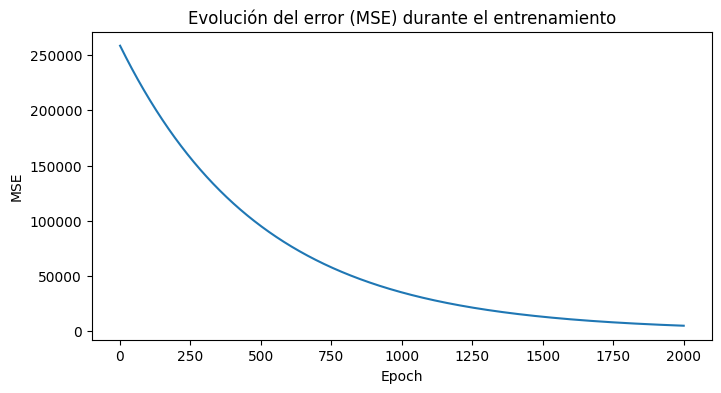

In [17]:
plt.figure(figsize=(8,4))
plt.plot(epochs, percep_reg.loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Evolución del error (MSE) durante el entrenamiento')

In [18]:
plt.show()